# Analysis Of Employee Attrition

In [1]:
#importing basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls

warnings.filterwarnings('ignore')

In [2]:
#importing dataset

df=pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
#Exploring the dataset

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
#checking missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
#removing only one unique value columns and identifier column
df.pop('EmployeeNumber')
df.pop('Over18')
df.pop('StandardHours')
df.pop('EmployeeCount')

0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Text(0.5, 1.0, 'Attrition Count')

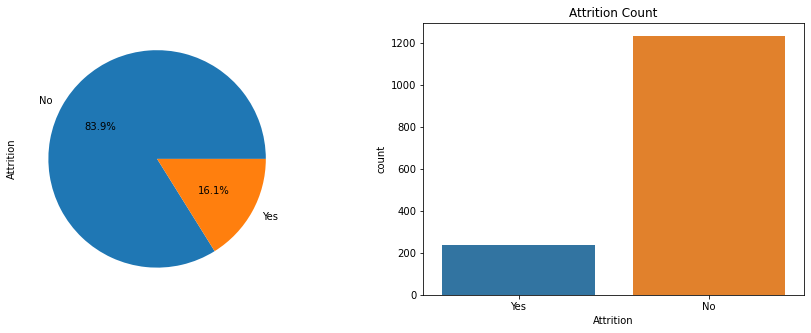

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['Attrition'])
plt.title('Attrition Count')

In [12]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

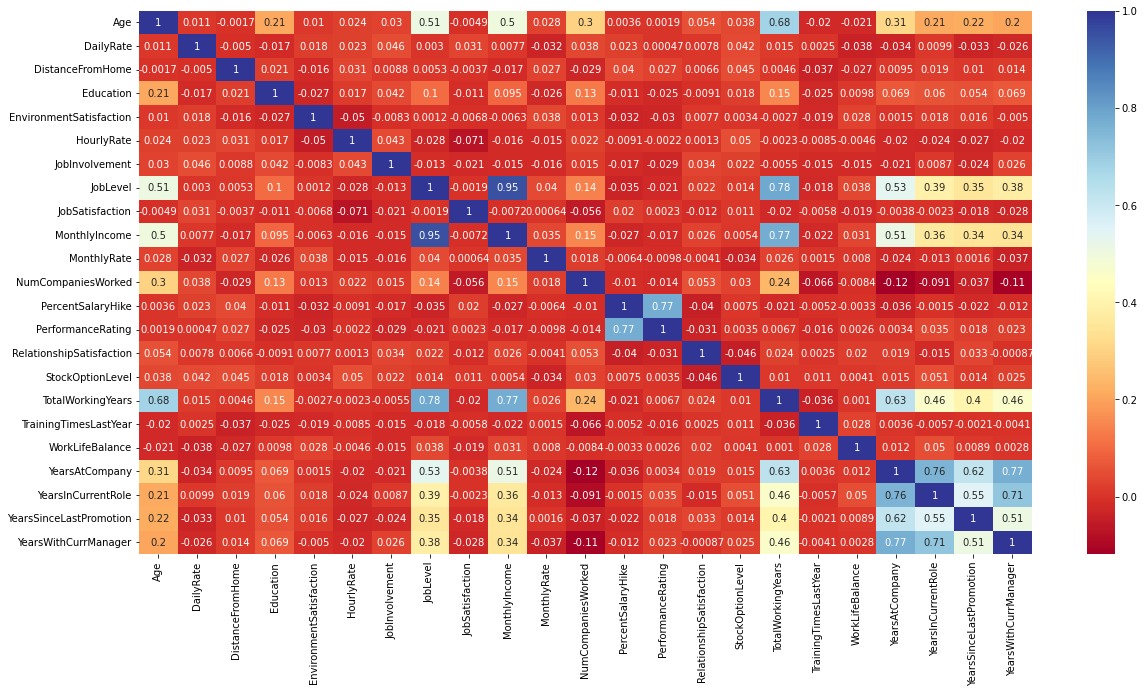

In [13]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()


<AxesSubplot:xlabel='Attrition', ylabel='JobRole'>

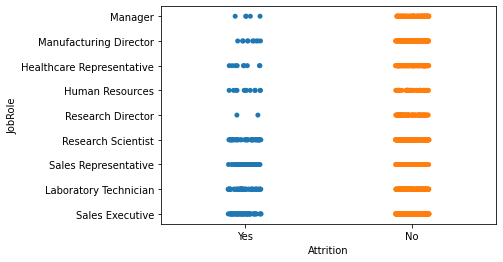

In [14]:
sns.stripplot(x='Attrition',y='JobRole',data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

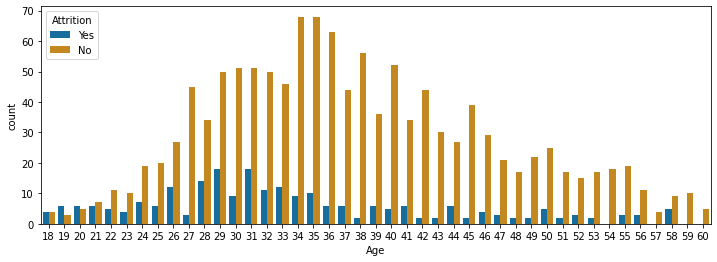

In [15]:
plt.subplots(figsize=(12,4))
sns.countplot(x='Age',hue='Attrition',data=df,palette='colorblind')

<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

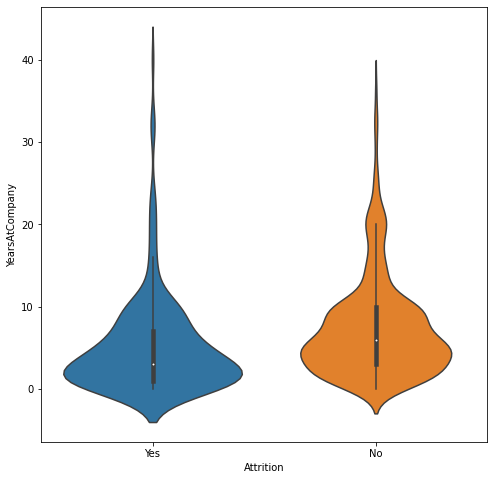

In [16]:
plt.figure(figsize=(8,8))
sns.violinplot(x='Attrition',y='YearsAtCompany',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='Gender'>

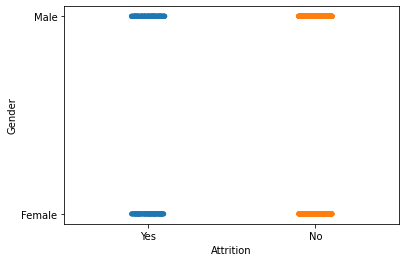

In [17]:
sns.stripplot(x='Attrition',y='Gender',data=df)

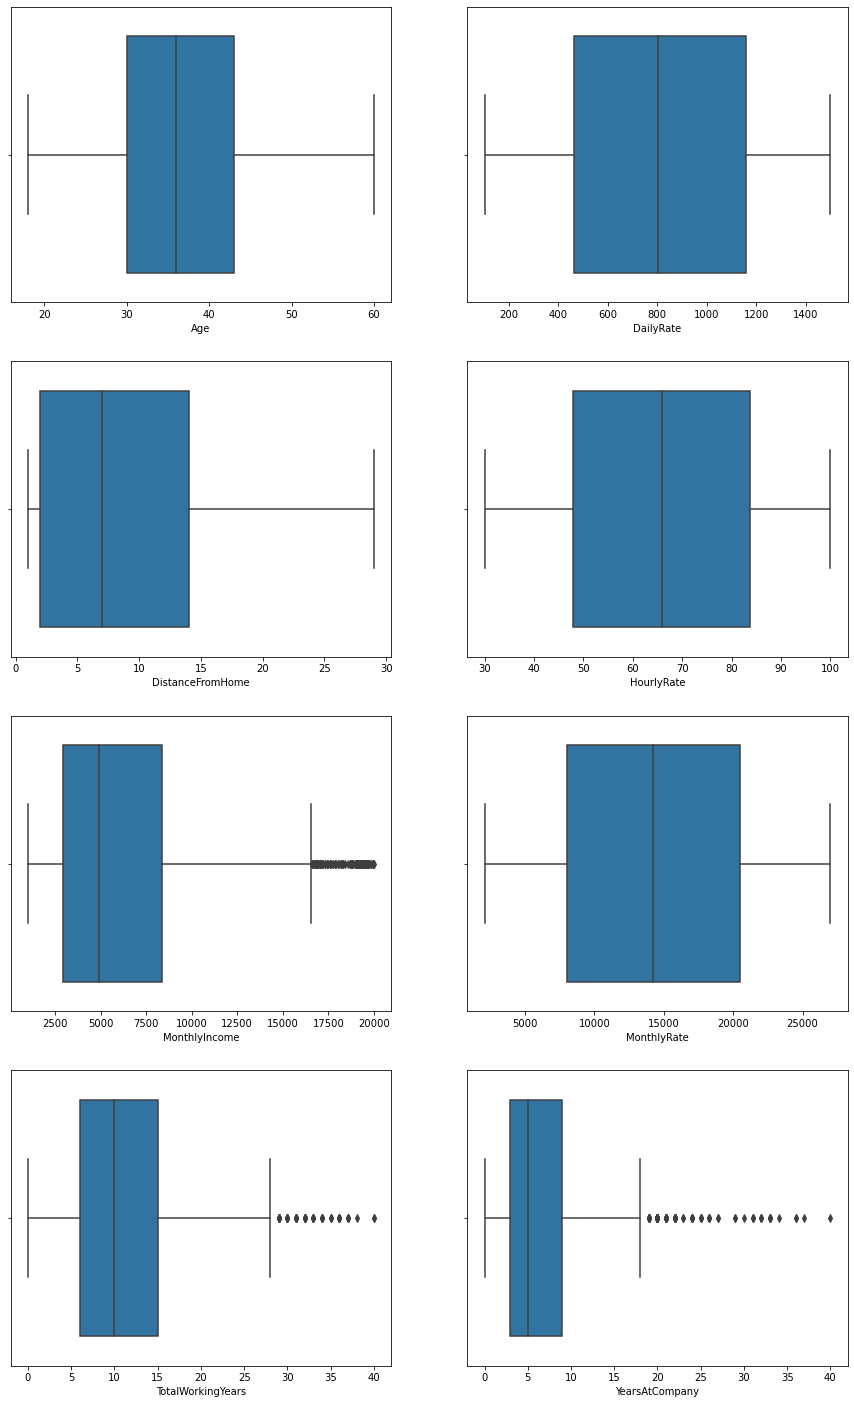

In [18]:
cont=[feature for feature in df.columns if df[feature].nunique()>20 and df[feature].nunique()<1470]
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(df[n],ax=ax[r,c])
    c+=1

In [19]:
#removing outliers
from scipy import stats
z=np.abs(stats.zscore(df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 
                          'JobInvolvement', 'JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                          'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears', 
                          'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole','YearsSinceLastPromotion',
                          'YearsWithCurrManager']]))
print(z)

threshold = 3
print(np.where(z>3))

           Age  DailyRate  DistanceFromHome  Education  \
0     0.446350   0.742527          1.010909   0.891688   
1     1.322365   1.297775          0.147150   1.868426   
2     0.008343   1.414363          0.887515   0.891688   
3     0.429664   1.461466          0.764121   1.061787   
4     1.086676   0.524295          0.887515   1.868426   
...        ...        ...               ...        ...   
1465  0.101159   0.202082          1.703764   0.891688   
1466  0.227347   0.469754          0.393938   1.868426   
1467  1.086676   1.605183          0.640727   0.085049   
1468  1.322365   0.546677          0.887515   0.085049   
1469  0.320163   0.432568          0.147150   0.085049   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                    0.660531    1.383138        0.379672  0.057788   
1                    0.254625    0.240677        1.026167  0.057788   
2                    1.169781    1.284725        1.026167  0.961486   
3                  

In [20]:
#choosing 3 threshold
df=df[(z<3).all(axis=1)]

In [21]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
o=OrdinalEncoder()
l=LabelEncoder()

In [22]:
#Encoding independent features with ordinal encoder
for i in df.columns:
    if df[i].dtypes=='O' and i!='Attrition':
        df[i]=o.fit_transform(df[i].values.reshape(-1,1))

#Encoding label column with label encoder
df['Attrition']=l.fit_transform(df['Attrition'])

In [23]:
df.shape

(1387, 31)

In [24]:
#removing Skewness
#using square root method to remove all the continuous variables except for monthly income
for i in cont:
    if np.abs(df[i].skew())>0.5 and i!='MonthlyIncome':
        df[i]=np.sqrt(df[i])

In [25]:
#Using log method to remove skewness from Monthly income
df['MonthlyIncome']=np.log(df['MonthlyIncome']) 

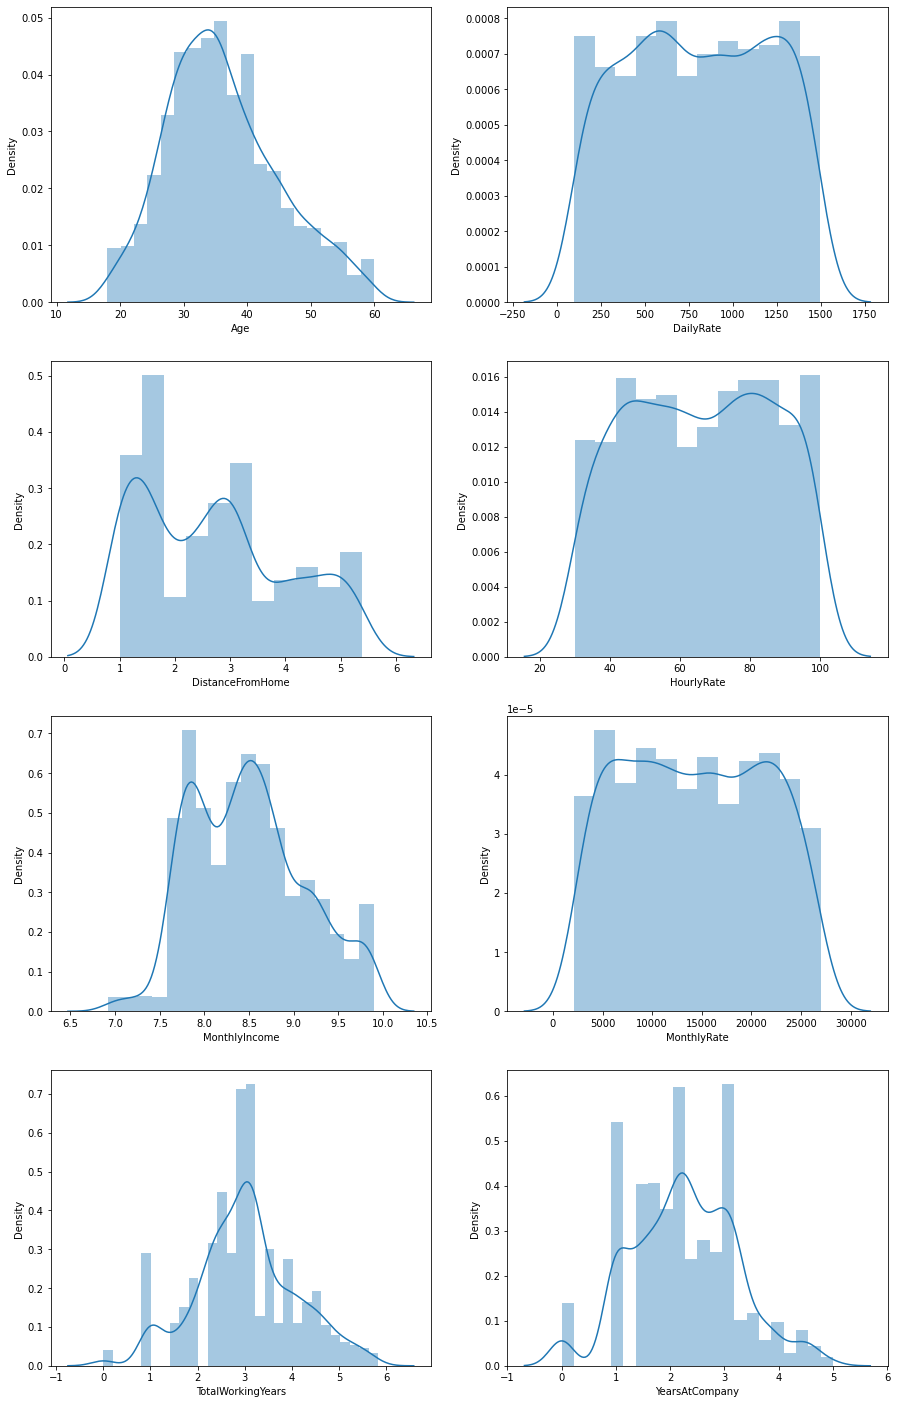

In [26]:
fig,ax=plt.subplots(4,2,figsize=(15,25))
r=0
c=0
for i,n in enumerate(cont):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.distplot(df[n],ax=ax[r,c])
    c+=1

In [27]:
#separating dependent and independent variables
x=df.copy()
x.drop('Attrition',axis=1,inplace=True)
y=df['Attrition']


In [28]:
#handling imbalance data
#Over Sampling the data using SMOTE
from imblearn.over_sampling import SMOTE
over=SMOTE()

In [29]:
x,y=over.fit_resample(x,y)

1    1158
0    1158
Name: Attrition, dtype: int64

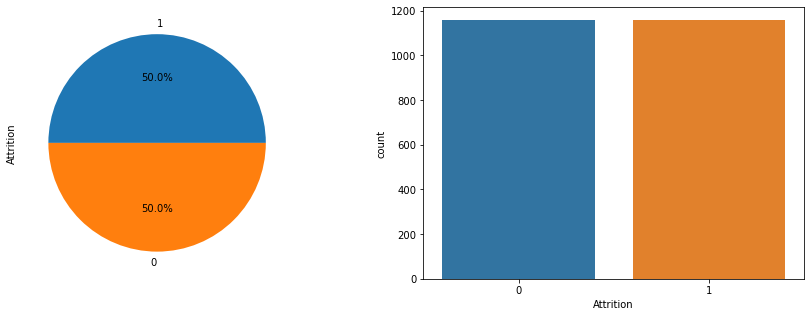

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
y.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(y)
y.value_counts()

In [31]:
#Scaling the data using MinMaxScaler scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [32]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

In [33]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [34]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr=LogisticRegression()

In [37]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [38]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(lr.score(xtest,ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, lr.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, lr.predict(xtest))))

Test Result:

accuracy score: 0.8463
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       288
           1       0.84      0.86      0.85       291

    accuracy                           0.85       579
   macro avg       0.85      0.85      0.85       579
weighted avg       0.85      0.85      0.85       579


Confusion Matrix: 
 [[239  49]
 [ 40 251]]



# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier()

In [41]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [42]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(knn.score(xtest,ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, knn.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, knn.predict(xtest))))

Test Result:

accuracy score: 0.8273
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.67      0.79       288
           1       0.75      0.98      0.85       291

    accuracy                           0.83       579
   macro avg       0.86      0.83      0.82       579
weighted avg       0.86      0.83      0.82       579


Confusion Matrix: 
 [[193  95]
 [  5 286]]



# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain, ytrain)

GaussianNB()

In [44]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(nb.score(xtest,ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, nb.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, nb.predict(xtest))))

Test Result:

accuracy score: 0.7686
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.69      0.75       288
           1       0.73      0.85      0.79       291

    accuracy                           0.77       579
   macro avg       0.78      0.77      0.77       579
weighted avg       0.78      0.77      0.77       579


Confusion Matrix: 
 [[198  90]
 [ 44 247]]



# SVM

In [45]:
from sklearn.svm import SVC

In [46]:
svm=SVC(probability=True)

In [47]:
svm.fit(xtrain,ytrain)

SVC(probability=True)

In [48]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(svm.score(xtest,ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, svm.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, svm.predict(xtest))))

Test Result:

accuracy score: 0.9102
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       288
           1       0.92      0.90      0.91       291

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.91      0.91      0.91       579


Confusion Matrix: 
 [[265  23]
 [ 29 262]]



# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier(random_state=42)

In [51]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

In [52]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(dt.score(xtest,ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, dt.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, dt.predict(xtest))))

Test Result:

accuracy score: 0.8238
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       288
           1       0.82      0.84      0.83       291

    accuracy                           0.82       579
   macro avg       0.82      0.82      0.82       579
weighted avg       0.82      0.82      0.82       579


Confusion Matrix: 
 [[234  54]
 [ 48 243]]



# Bagged Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [54]:
clf = DecisionTreeClassifier(random_state=42)

In [55]:
clf = DecisionTreeClassifier(random_state=42)

In [56]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=5000,
                            bootstrap=True, n_jobs=-1, random_state=42)

In [57]:
bag_clf.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=5000, n_jobs=-1, random_state=42)

In [58]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(bag_clf.score(xtest,ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, bag_clf.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, bag_clf.predict(xtest))))  

Test Result:

accuracy score: 0.9050
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.92      0.91       288
           1       0.92      0.89      0.90       291

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.90       579
weighted avg       0.91      0.91      0.90       579


Confusion Matrix: 
 [[266  22]
 [ 33 258]]



# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf_clf = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=30)

In [61]:
rf_clf.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=30)

In [62]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(rf_clf.score(xtest, ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, rf_clf.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, rf_clf.predict(xtest))))



Test Result:

accuracy score: 0.9240
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       288
           1       0.96      0.89      0.92       291

    accuracy                           0.92       579
   macro avg       0.93      0.92      0.92       579
weighted avg       0.93      0.92      0.92       579


Confusion Matrix: 
 [[276  12]
 [ 32 259]]



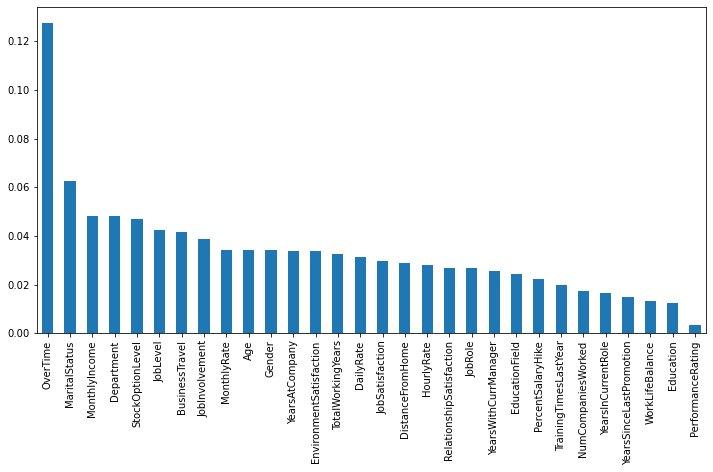

In [63]:
pd.Series(rf_clf.feature_importances_, 
         index=xtrain.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# Extra Tree

In [64]:
from sklearn.ensemble import ExtraTreesClassifier

In [65]:
xt_clf = ExtraTreesClassifier(random_state=42)

In [66]:
xt_clf.fit(xtrain, ytrain)

ExtraTreesClassifier(random_state=42)

In [67]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(xt_clf.score(xtest, ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, xt_clf.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, xt_clf.predict(xtest)))) 

Test Result:

accuracy score: 0.9465
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       288
           1       0.96      0.93      0.95       291

    accuracy                           0.95       579
   macro avg       0.95      0.95      0.95       579
weighted avg       0.95      0.95      0.95       579


Confusion Matrix: 
 [[276  12]
 [ 19 272]]



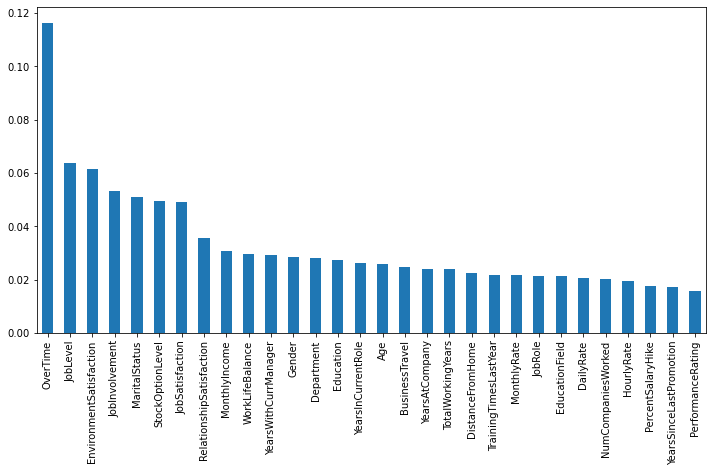

In [68]:
pd.Series(xt_clf.feature_importances_, 
         index=xtrain.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# Adaboost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
ada_clf = AdaBoostClassifier()

In [71]:
ada_clf.fit(xtrain, ytrain)

AdaBoostClassifier()

In [72]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(ada_clf.score(xtest, ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, ada_clf.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, ada_clf.predict(xtest)))) 

Test Result:

accuracy score: 0.8998
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       288
           1       0.89      0.91      0.90       291

    accuracy                           0.90       579
   macro avg       0.90      0.90      0.90       579
weighted avg       0.90      0.90      0.90       579


Confusion Matrix: 
 [[257  31]
 [ 27 264]]



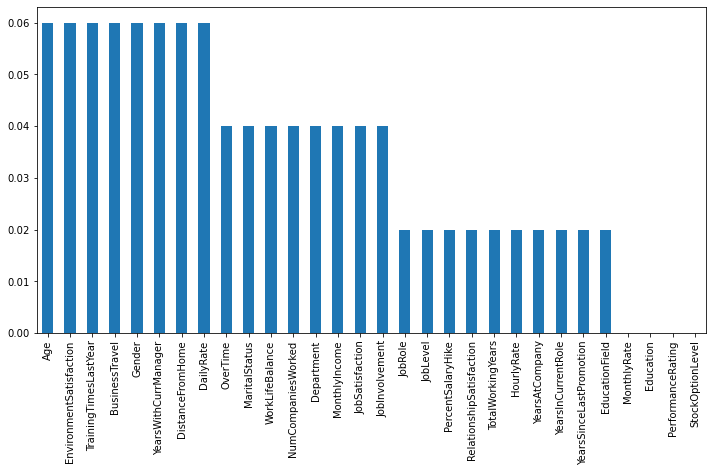

In [73]:
pd.Series(ada_clf.feature_importances_, 
         index=xtrain.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# Gradient Boosting

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

In [75]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [76]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(gbc_clf.score(xtest, ytest)))
print("Classification Report: \n {}\n".format(classification_report(ytest, gbc_clf.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, gbc_clf.predict(xtest)))) 

Test Result:

accuracy score: 0.9257
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.93       288
           1       0.94      0.91      0.92       291

    accuracy                           0.93       579
   macro avg       0.93      0.93      0.93       579
weighted avg       0.93      0.93      0.93       579


Confusion Matrix: 
 [[271  17]
 [ 26 265]]



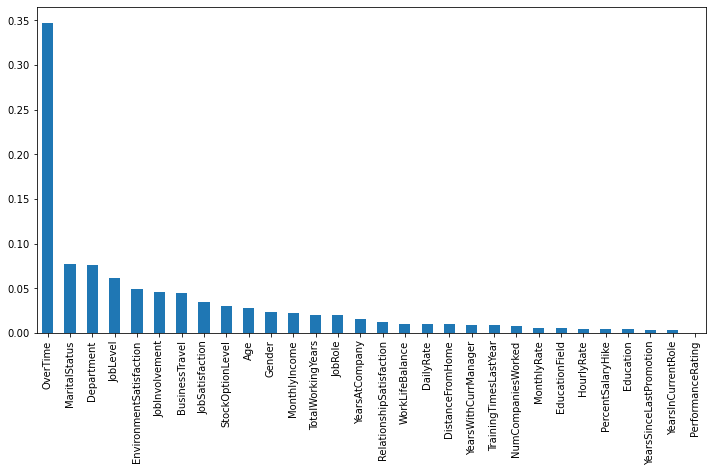

In [77]:
pd.Series(gbc_clf.feature_importances_, 
         index=xtrain.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6));

# Voting Classifier

In [78]:
from sklearn.ensemble import VotingClassifier

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


vc = VotingClassifier(
    estimators=[('lr', LogisticRegression()), 
                ('knn', KNeighborsClassifier()), 
                ('gnb', GaussianNB())], 
    voting='hard')

In [80]:
vc.fit(xtrain, ytrain)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('knn', KNeighborsClassifier()),
                             ('gnb', GaussianNB())])

In [81]:
print("Test Result:\n")        
print("accuracy score: {0:.4f}".format(vc.score(xtrain, ytrain)))
print("Classification Report: \n {}\n".format(classification_report(ytest, vc.predict(xtest))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(ytest, vc.predict(xtest)))) 

Test Result:

accuracy score: 0.8785
Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.76      0.83       288
           1       0.80      0.91      0.85       291

    accuracy                           0.84       579
   macro avg       0.85      0.84      0.84       579
weighted avg       0.85      0.84      0.84       579


Confusion Matrix: 
 [[220  68]
 [ 25 266]]



# Model Accuracies

In [82]:
bag_cf1=bag_clf.score(xtest, ytest)*100
rf_cf1=rf_clf.score(xtest, ytest)*100
xt_cf1=xt_clf.score(xtest, ytest)*100
ada_cf1=ada_clf.score(xtest, ytest)*100
gbc_cf1=gbc_clf.score(xtest, ytest)*100
v_cf1=vc.score(xtrain, ytrain)*100

lr1=lr.score(xtest,ytest)*100
knn1=knn.score(xtest,ytest)*100
nb1=nb.score(xtest,ytest)*100
svc1=svm.score(xtest,ytest)*100
dt1=dt.score(xtest,ytest)*100

In [83]:
accuracy=[bag_cf1,rf_cf1,xt_cf1,ada_cf1,gbc_cf1,v_cf1]
classifiers=['Bagged Decision Tree','Random Forest Classifier','Extra Tree Classifier','AdaBoost', 'Gradient Boosting','Voting Classifier']

In [84]:
accuracy1=[lr1,knn1,nb1,svc1,dt1]
classifiers1=['Logistic Regression','KNN','Naive Bayes','SVC', 'Decision Tree']

In [85]:
models_acc_df1 = pd.DataFrame()
models_acc_df1['Models'] = classifiers1
models_acc_df1['Accuracy'] = accuracy1
models_acc_df1

,Models,Accuracy
0,Logistic Regression,84.628670
1,KNN,82.728843
2,Naive Bayes,76.856649
3,SVC,91.018998
4,Decision Tree,82.383420


In [86]:
models_acc_df = pd.DataFrame()
models_acc_df['Models'] = classifiers
models_acc_df['Accuracy'] = accuracy
models_acc_df

,Models,Accuracy
0,Bagged Decision Tree,90.500864
1,Random Forest Classifier,92.400691
2,Extra Tree Classifier,94.645941
3,AdaBoost,89.982729
4,Gradient Boosting,92.573402
5,Voting Classifier,87.852619


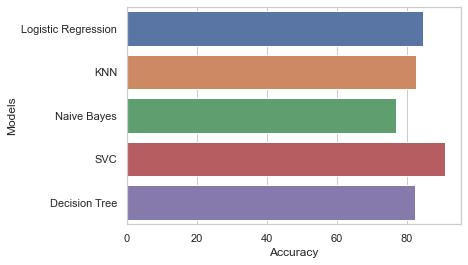

In [87]:
sns.set(style='whitegrid')
ax=sns.barplot(y="Models",x="Accuracy",data=models_acc_df1)

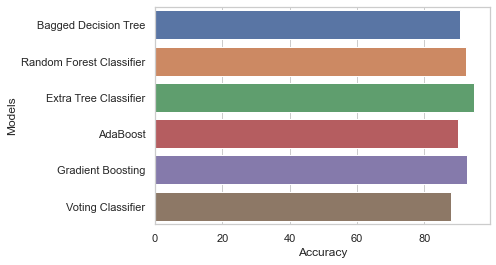

In [88]:
sns.set(style='whitegrid')
ax=sns.barplot(y="Models",x="Accuracy",data=models_acc_df)

In [89]:
import joblib

In [90]:
filename = 'dt.sav'

In [91]:
joblib.dump(xt_clf, open(filename, 'wb'))